<a href="https://colab.research.google.com/github/iabhibagaria/Abhi/blob/master/Diabetic_Patient_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here in this file, we will clean, do EDA and make Model on Diabetic patient Dataset.

So now we will import the required libraries.

In [111]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt      # for plots and visualizations
import plotly.graph_objects as go    #for plot
import plotly.express as px          # for plots
import missingno as msno             # for plotting missing data

#this eliminates the requirement of plt.show9 after every plot
%matplotlib inline

# changing default fig size
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn',
           'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism',
           'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'twilight']

from sklearn.model_selection import train_test_split #for splitting dataset
from sklearn.preprocessing import MinMaxScaler       # for data Normalization
from sklearn.preprocessing import StandardScaler     # for data Standardisation
from sklearn.ensemble import RandomForestClassifier # model
from sklearn.linear_model import LogisticRegression #model
from sklearn.neighbors import KNeighborsClassifier   #model
from sklearn.metrics import confusion_matrix, classification_report  # for model evaluation
from mlxtend.plotting import plot_confusion_matrix  # to plot confusion matrix
from sklearn.model_selection import GridSearchCV    # to fine tune model


NO we will read our dataset.

In [112]:
df = pd.read_csv('/content/drive/MyDrive/Ml dl data science  datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Getting Some Info about Dataset.
Some general stats about given data.

In [113]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Now we will check whether any Nan value is there or not

In [115]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Excellent! this dataset has no null values

**Data Cleaning**:

In the above stats we can see that there are people with 0 BP (dead person?), 0 skin thickness (skeleton?) and 0 Glucose (how do you even survive?).

Let's convert those 0s to NaN.

In [116]:
df["Glucose"] = df["Glucose"].apply(lambda x : np.nan if x==0 else x)
df["BloodPressure"] = df["BloodPressure"].apply(lambda x : np.nan if x==0 else x)
df["SkinThickness"] = df["SkinThickness"].apply(lambda x : np.nan if x==0 else x)
df["Insulin"] = df["Insulin"].apply(lambda x : np.nan if x==0 else x)
df["BMI"] = df["BMI"].apply(lambda x : np.nan if x==0 else x)

Now there might come null values in some column. Lets have a look at those.

In [117]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# **EDA**

Distribution of data


In [118]:
px.pie(df, names='Outcome')

Shows 65.1% of people have no Diabetes and 34.9% of people have diabetes.
Lets have a countplot of this.

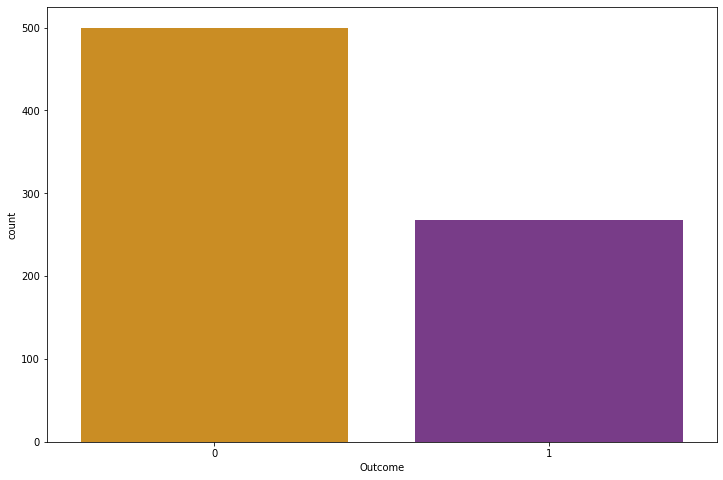

In [119]:
sns.countplot(x='Outcome', data = df, palette= random.choice(pallete))

For more info lets plot more plot and relate various Characters to the Outcome.

**1. Pregnancy vs outcome**

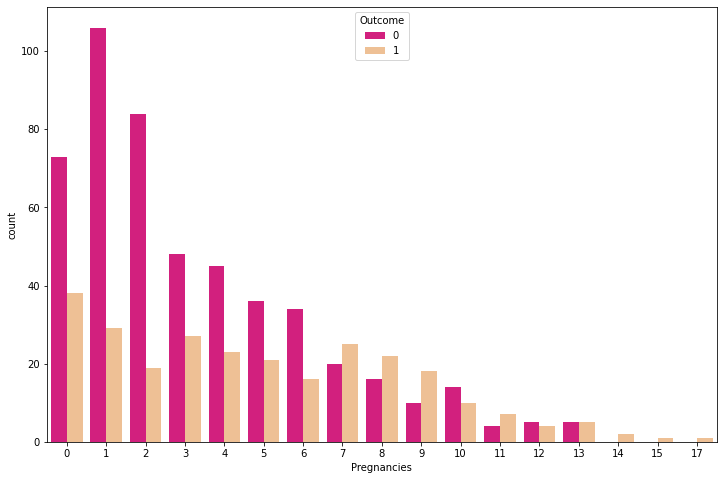

In [120]:
sns.countplot(x="Pregnancies", hue = "Outcome", data=df, palette=random.choice(pallete))

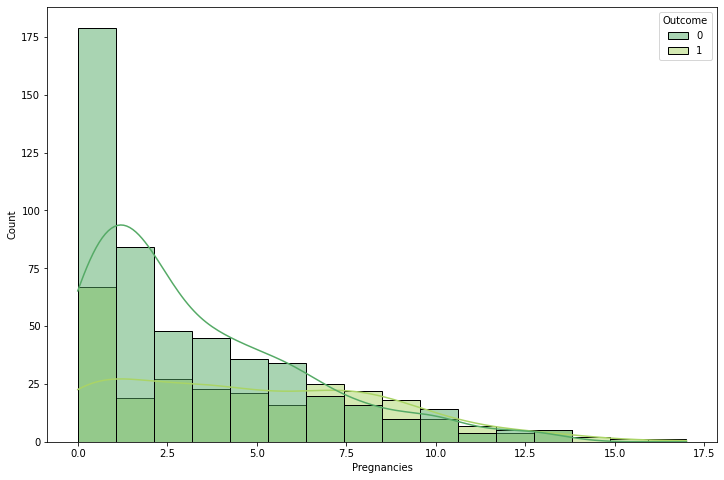

In [121]:
sns.histplot(x="Pregnancies", hue="Outcome", data=df, kde=True, palette=random.choice(pallete))

**2. Blood pressure vs Outcome**

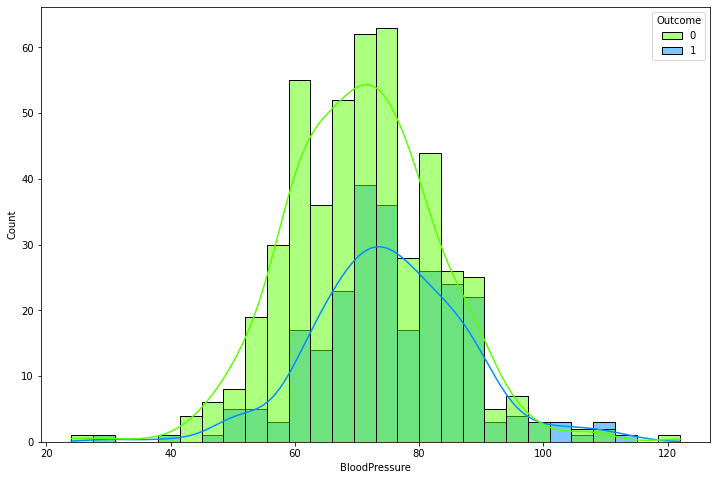

In [122]:
sns.histplot(x="BloodPressure", hue = "Outcome", data=df, kde=True, palette=random.choice(pallete))

Here we can see that the BP levels of diabetic people is a little high.



**3. Glucose vs outcome**

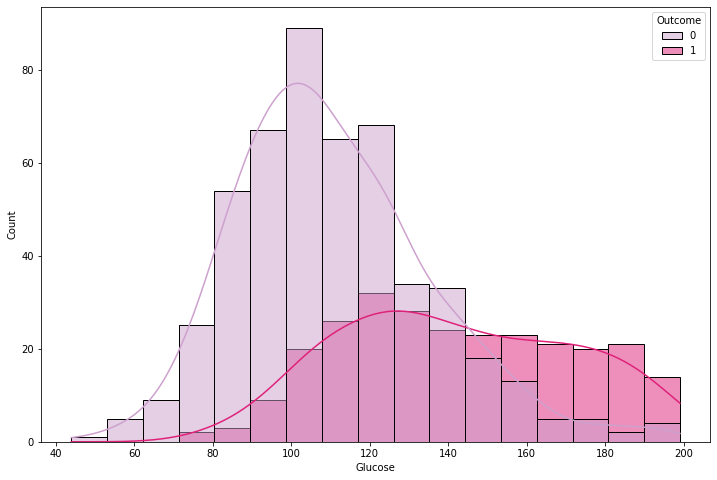

In [123]:
sns.histplot(x="Glucose", hue = "Outcome", data=df, kde=True, palette=random.choice(pallete))

Here we can see that the Glucose levels of diabetic people is a little high.



4.**Skin thickness vs outcome**

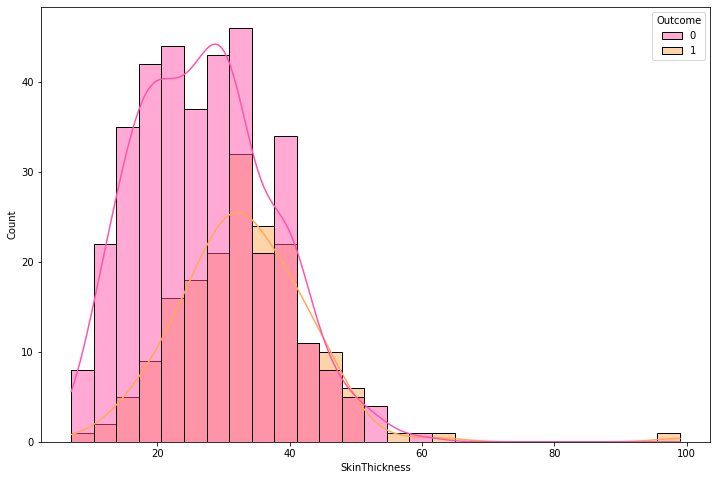

In [124]:
sns.histplot(x='SkinThickness', hue='Outcome', data=df, kde=True, palette=random.choice(pallete))

Here we can see diabetic people have a little more thick skin.



**5. Insuline vs Outcome**

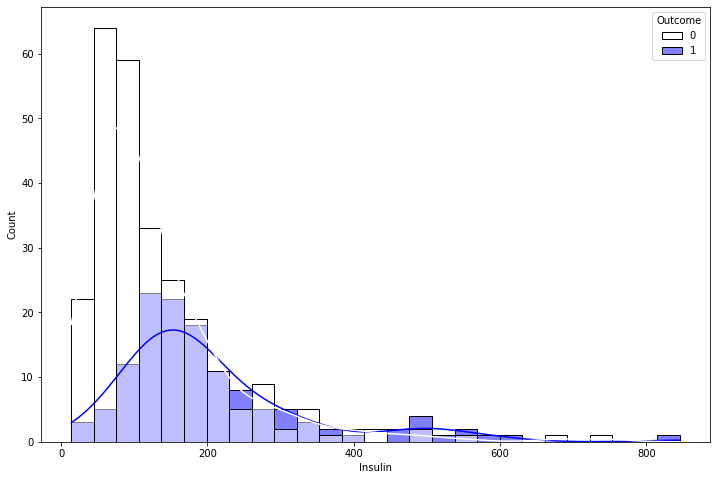

In [125]:
sns.histplot(x="Insulin", hue="Outcome", data=df, kde=True, palette=random.choice(pallete))


Here we can see diabetic people have a little more insulin.



**6. Age vs Outcome**

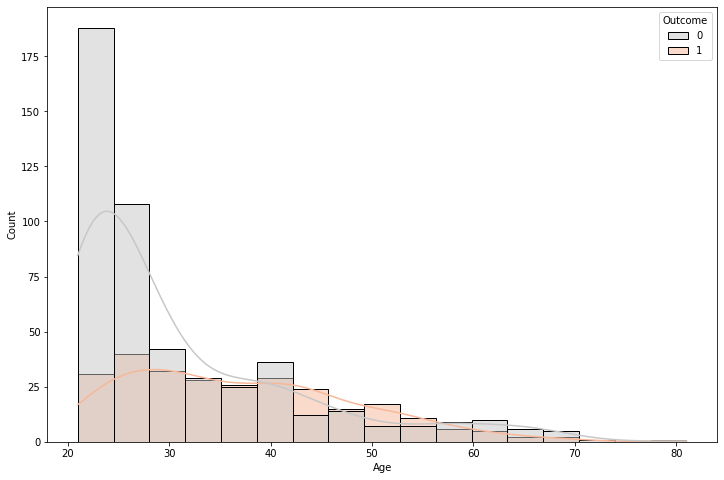

In [126]:
sns.histplot(x="Age", hue="Outcome", data=df, kde=True, palette=random.choice(pallete))

Here we can see Aged people have a little more insulin.



**7. BMI vs Outcome**

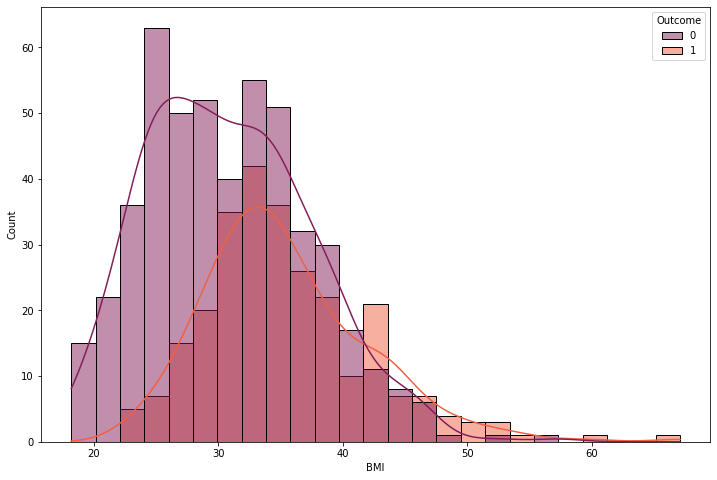

In [127]:
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True, palette=random.choice(pallete))

Diabetic people have higher BMI or fat.

**8. DiabetesPedigreeFunction vs Outcome**

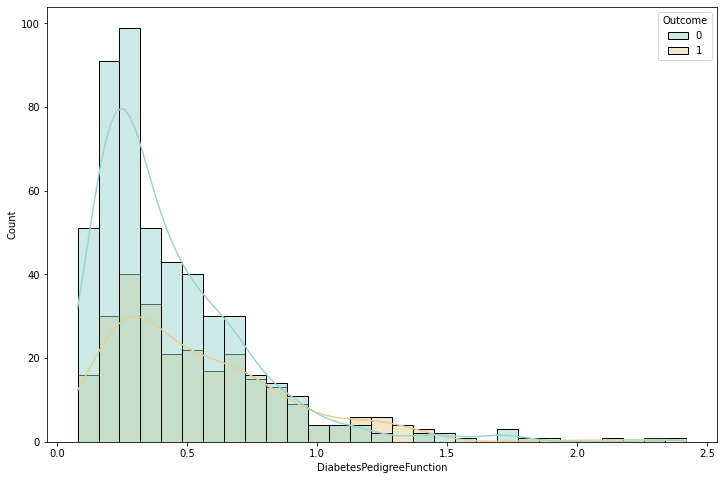

In [128]:
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=df, kde=True, palette=random.choice(pallete))

**Now as we get info from histplot, now we will use Pairplot**

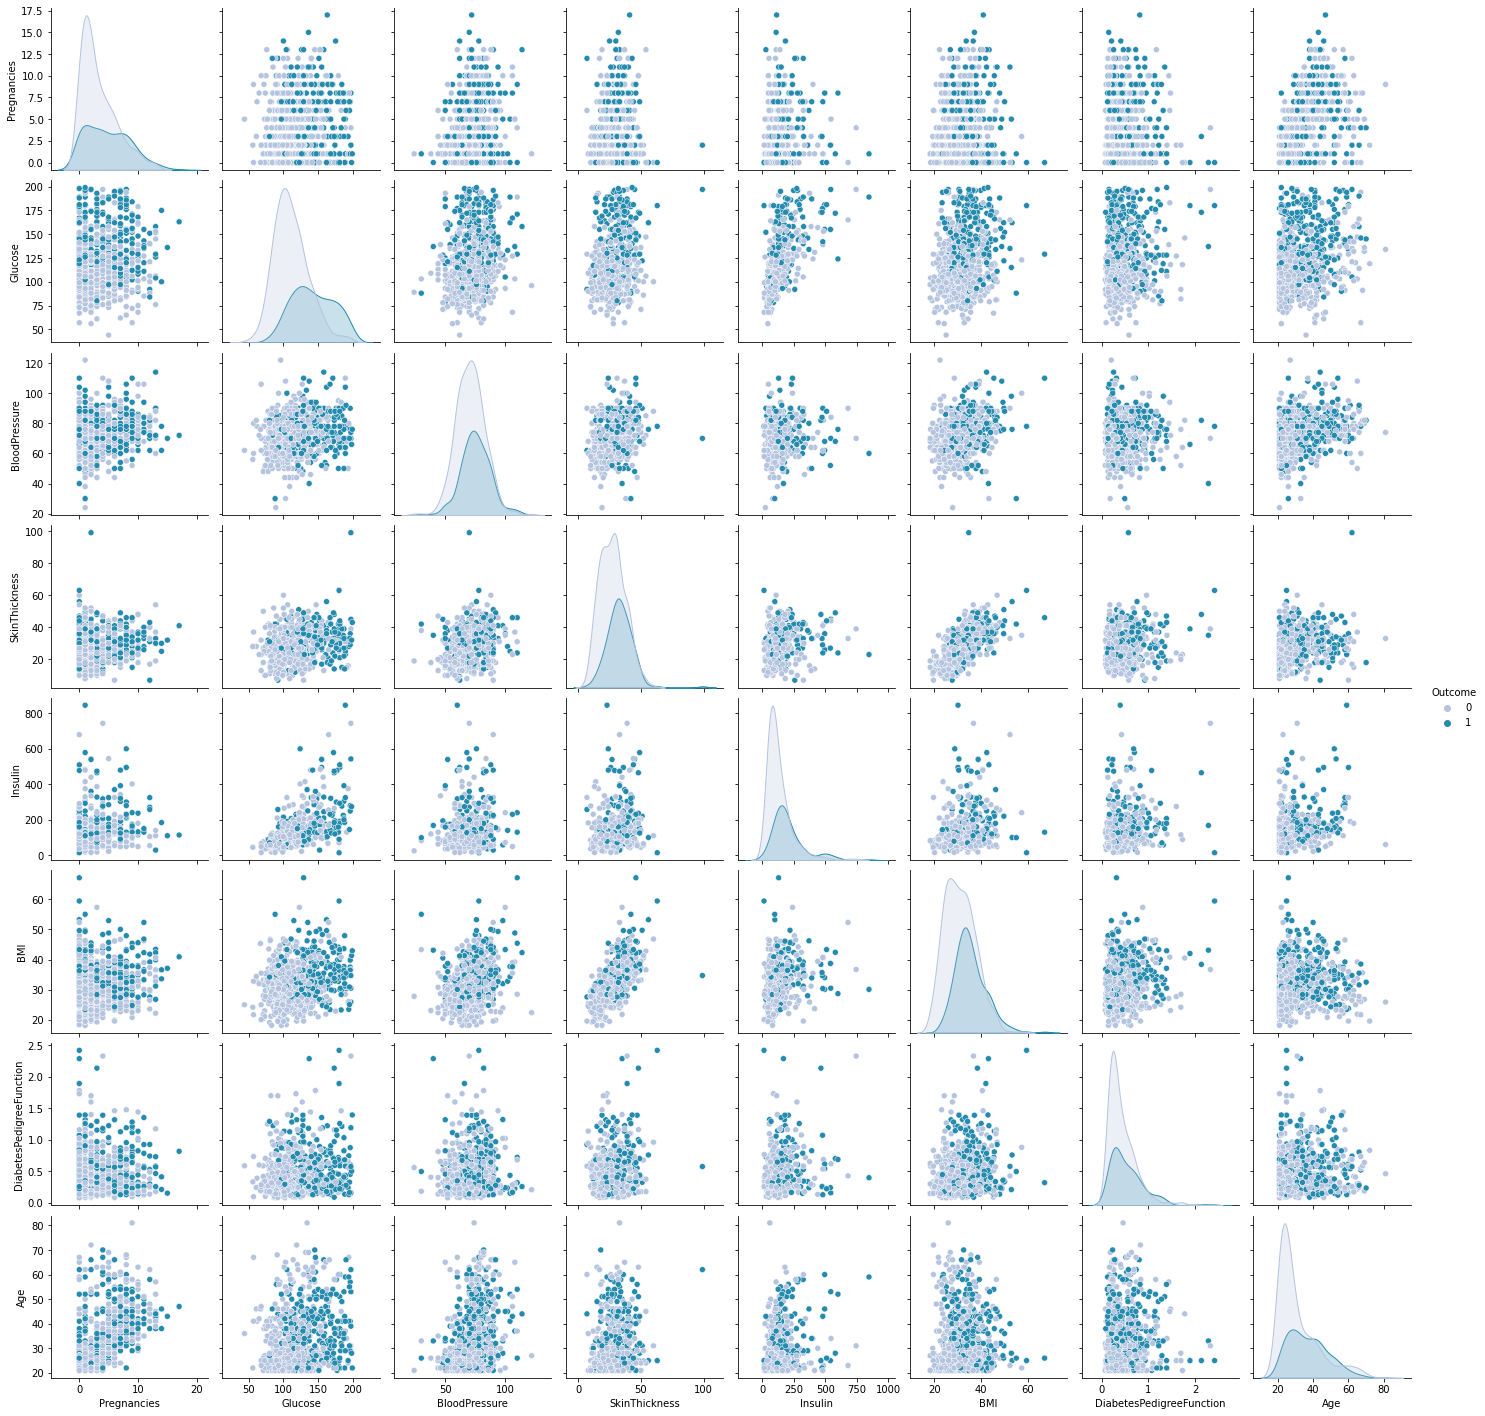

In [129]:
sns.pairplot(df, hue='Outcome', palette=random.choice(pallete))

**Boxplot**

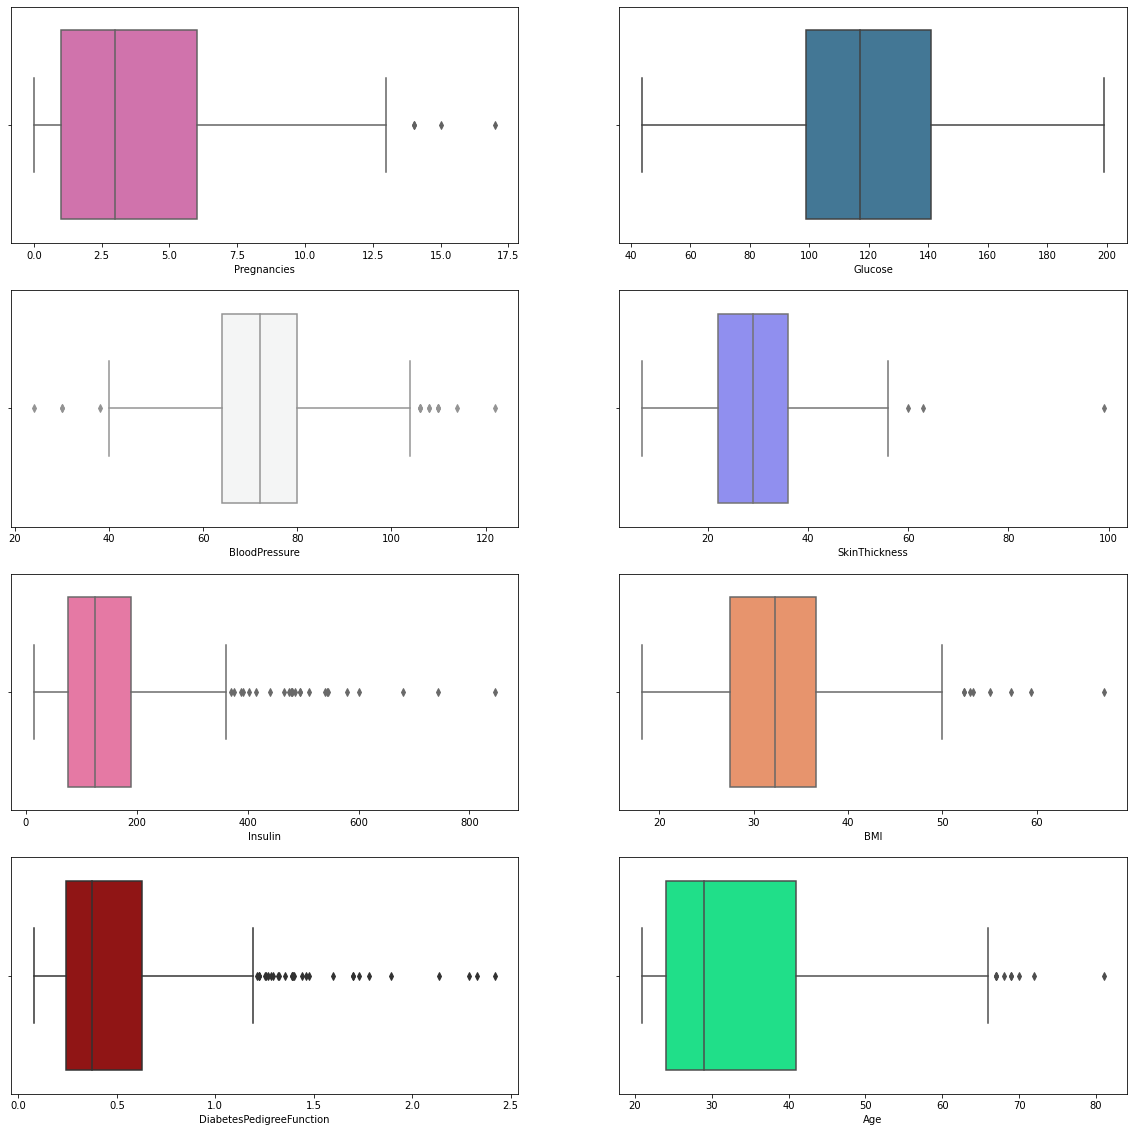

In [130]:
fig, axs = plt.subplots(4,2, figsize=(20,20))
axs = axs.flatten()
for i in range(len(df.columns)-1):
  sns.boxplot(data=df, x=df.columns[i], ax= axs[i], palette=random.choice(pallete))

Now **Correlation Matrix**

Text(0.5, 1.0, 'Correlation Map')

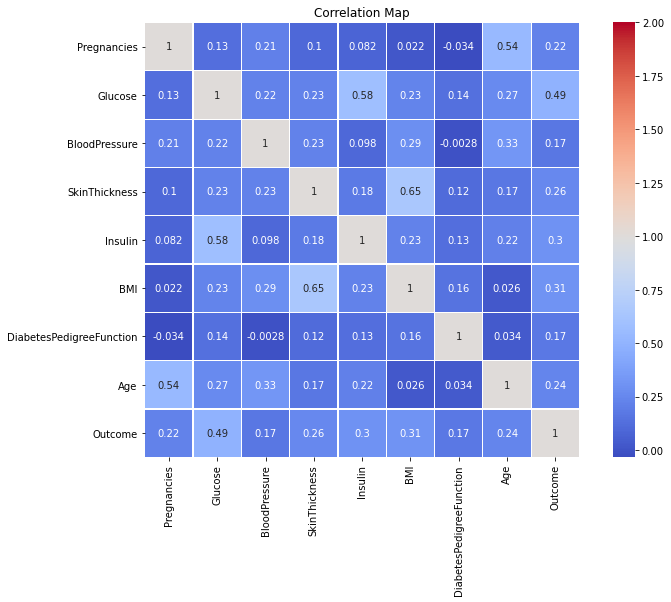

In [131]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=2, square=True, cmap='coolwarm',linecolor='white', annot=True).set_title("Correlation Map")

We can see that outcome is highly correalated with Glucose.

**Cleaning the Dataset**

Getting rid of Nan values.

In [132]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Barplot of these

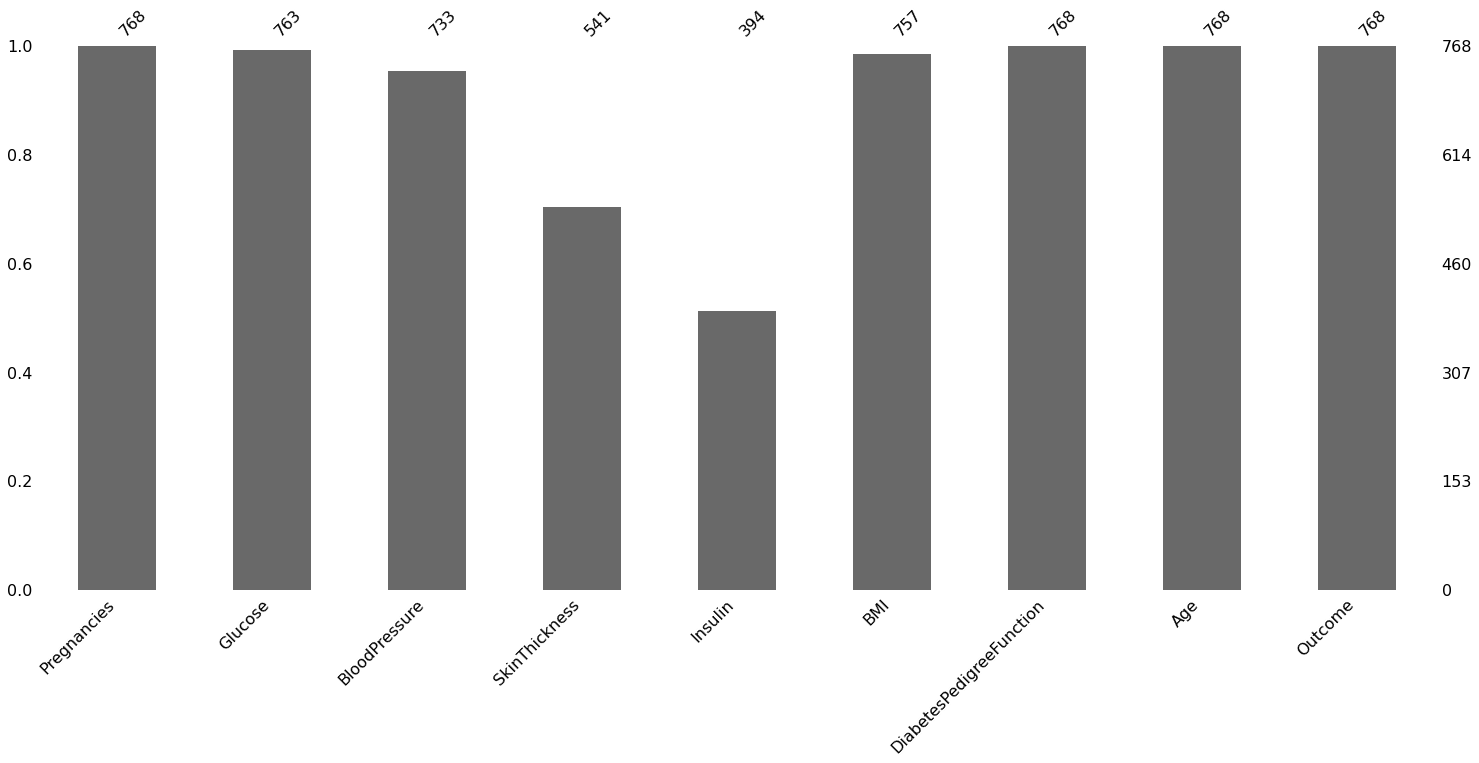

In [133]:
msno.bar(df)

**Matrix**

How to read?

Each row in the matrix represents that row in the dataset. If any value in that row is NaN, then it is white else black(/gray).

The graph on the right shows the number of missing values in each row. If a row has too many NaN values, we can remove that

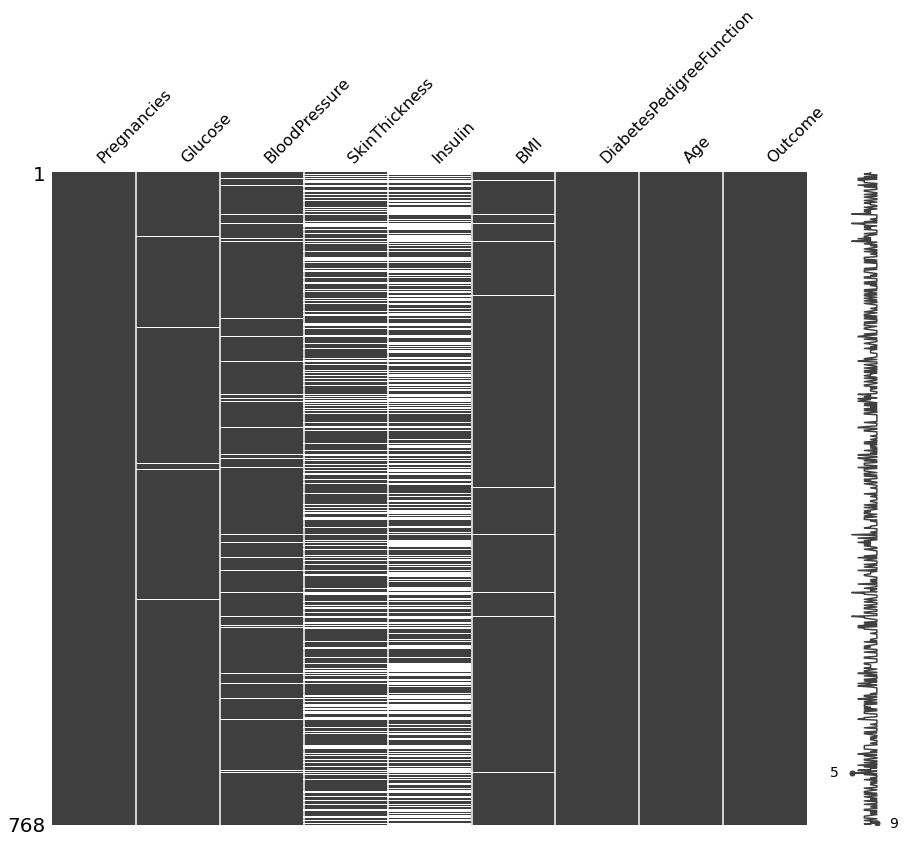

In [134]:
msno.matrix(df, figsize=(15,12))

**Heatmap**

The heatmap is used to identify correlations of the nullity between each of the different columns.

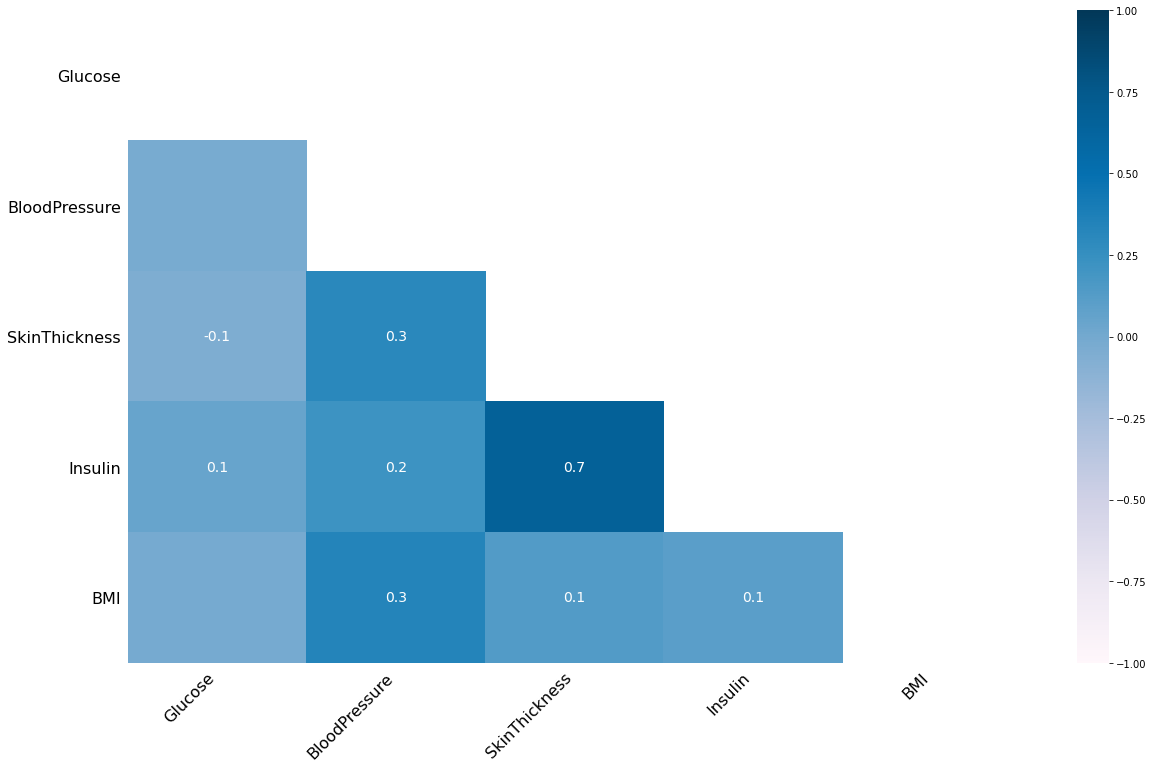

In [135]:
msno.heatmap(df, cmap=random.choice(pallete))

Here we can see that Insulin and Skin Thickness are highly positively correlated with each other (nullity corr).



**Dendrogram**

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

How to read?

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

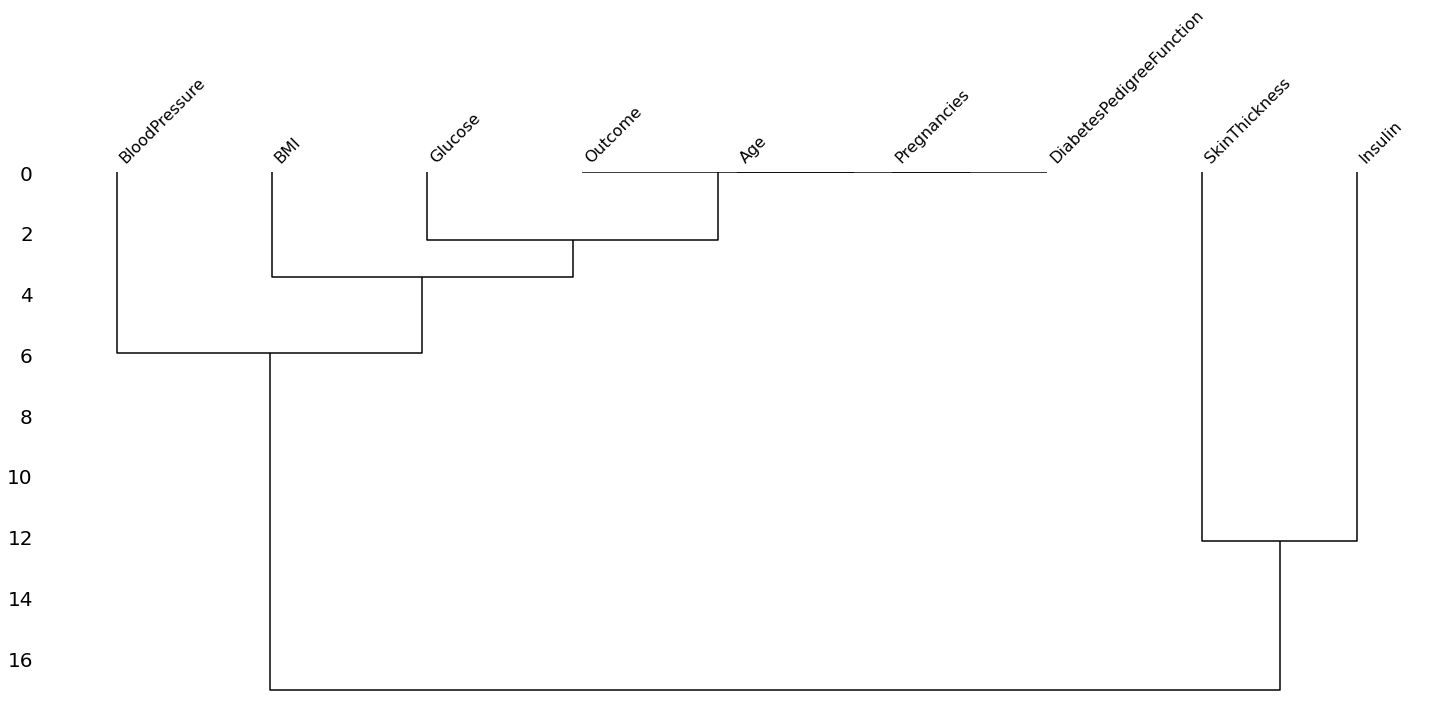

In [136]:
msno.dendrogram(df)

%age of Nans in the columns:

In [137]:
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

We can see that the Insulin column has nearly 50% of NaN values. Therefore, it would be wise to drop the column entirely!



In [138]:
df.drop(columns=['Insulin'],inplace=True)

In [139]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [140]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

For highly skew value we will impute the column with median and others with mean.

In [141]:
# Highly skewed
df["BMI"].replace(to_replace=np.nan,value=df["BMI"].median(), inplace=True)
df["Pregnancies"].replace(to_replace=np.nan,value=df["Pregnancies"].median(), inplace=True)

# Normal
df["Glucose"].replace(to_replace= np.nan, value= df["Glucose"].mean(), inplace=True)
df["BloodPressure"].replace(to_replace= np.nan, value= df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].replace(to_replace= np.nan, value= df["SkinThickness"].mean(), inplace=True)

**Outliers**

Now we have to take care of outliers and remove them if any present.

Some of the methods to detect them and remove them are:
1. IQR method
2. Median method

use any of them.

We will use IQR:

In [142]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [143]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Before: {df.shape}, After: {df_out.shape}')


Before: (768, 8), After: (627, 8)


In this method we loose Data point.

There is another method where we loose no data point.

**Method 2: Median Method**

In this method we will replace the outliers with median.


In [144]:
for col in df.columns[:-1]:
    up_out = df[col].quantile(0.90)
    low_out = df[col].quantile(0.10)
    med = df[col].median()
#     print(col, up_out, low_out, med)
    df[col] = np.where(df[col] > up_out, med, df[col])
    df[col] = np.where(df[col] < low_out, med, df[col])


In [145]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.213542,119.185461,72.397794,28.988775,32.127083,0.411184,31.007812,0.348958
std,2.561112,18.584971,7.302671,4.533622,4.047594,0.171833,7.469534,0.476951
min,0.000000,87.000000,58.000000,18.000000,24.000000,0.165000,22.000000,0.000000
25%,1.000000,106.000000,68.000000,29.000000,29.600000,0.278000,25.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,32.300000,0.372500,29.000000,0.000000
75%,5.000000,129.000000,76.000000,29.153420,34.500000,0.514000,36.000000,1.000000
max,9.000000,167.000000,88.000000,40.000000,41.500000,0.878000,51.000000,1.000000


**Modelling**

Splitting the data

In [146]:
X = df_out[df_out.columns[:-1]]
y = df_out['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0, stratify = y)

Normalize the Data

In [147]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [148]:
df['Glucose'].replace(to_replace= np.nan, value= df['Glucose'].mean, inplace=True)
df['BloodPressure'].replace(to_replace= np.nan, value= df['BloodPressure'].mean, inplace=True)
df['SkinThickness'].replace(to_replace= np.nan, value= df['BloodPressure'].mean, inplace=True)

**Models**

**1. Logistic Regression**

In [149]:
log_params = {'C' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000]}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(X_train_norm, y_train)
log_pred = log_model.predict(X_test_norm)

**2. Random Forest Classifier**

In [150]:
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(60, 140, 20)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(X_train_norm, y_train)
rf_pred = rf_model.predict(X_test_norm)

**K neighbor Classifier**

In [151]:
knn_params = {'n_neighbors': list(range(1,50))}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(X_train_norm, y_train)
knn_pred = knn_model.predict(X_test_norm)

**Evaluation**

For the evaluation we will be mainly looking at Precision & Recall values. This is because in the dataset there are very less points for diabetic people, because of which even if a model predicts 0 for everyone, it can be very accurate!





In [152]:
print("Logistic Regression: \n", classification_report(y_test, log_pred))
print("Randon Forest Classifier: \n", classification_report(y_test, rf_pred))
print("K Neighbor Classifier: \n", classification_report(y_test, knn_pred))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        83
           1       0.75      0.42      0.54        43

    accuracy                           0.75       126
   macro avg       0.75      0.67      0.68       126
weighted avg       0.75      0.75      0.73       126

Randon Forest Classifier: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        83
           1       0.67      0.60      0.63        43

    accuracy                           0.76       126
   macro avg       0.74      0.72      0.73       126
weighted avg       0.76      0.76      0.76       126

K Neighbor Classifier: 
               precision    recall  f1-score   support

           0       0.72      0.94      0.82        83
           1       0.72      0.30      0.43        43

    accuracy                           0.72       126
   macro avg       0.72      0.62      0.62       12

Here we can see, Random Forest Classifier has better Precision and Recall (hence, better f1-score) compared to other models.



**Confusion Matrix**

**1. Logistic Regression**

<Figure size 864x576 with 0 Axes>

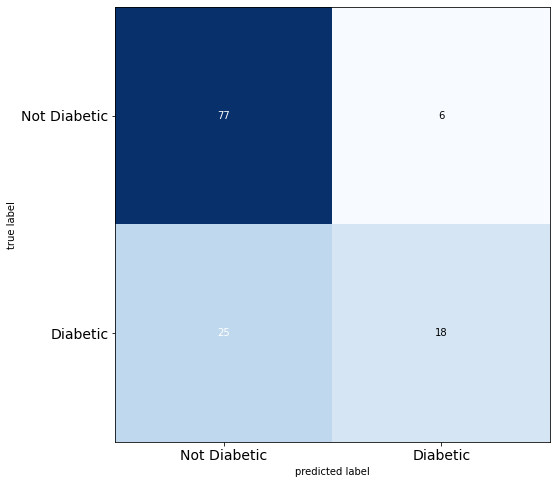

In [153]:
labels = ["Not Diabetic", "Diabetic"]
cm  = confusion_matrix(y_test, log_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap="Blues")
plt.xticks(range(2), labels, fontsize=14)
plt.yticks(range(2), labels, fontsize=14)
plt.show()


2. Random forest classifier

<Figure size 864x576 with 0 Axes>

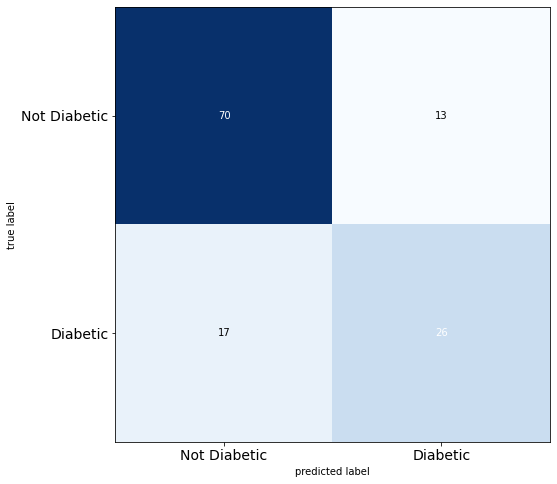

In [154]:
labels = ["Not Diabetic", "Diabetic"]
cm  = confusion_matrix(y_test, rf_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap="Blues")
plt.xticks(range(2), labels, fontsize=14)
plt.yticks(range(2), labels, fontsize=14)
plt.show()


**3. K Neighbor Classifier**

<Figure size 864x576 with 0 Axes>

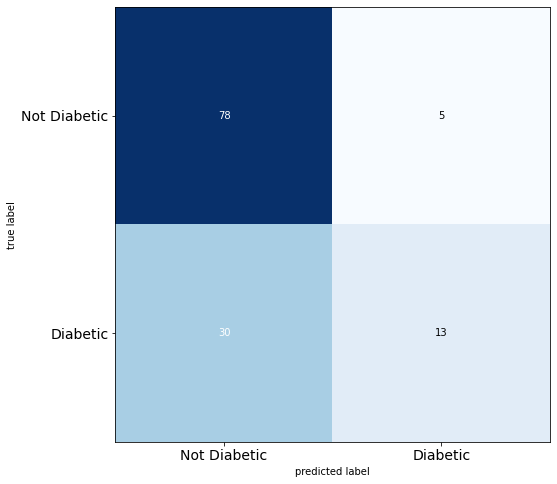

In [155]:
labels = ["Not Diabetic", "Diabetic"]
cm  = confusion_matrix(y_test, knn_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True, cmap="Blues")
plt.xticks(range(2), labels, fontsize=14)
plt.yticks(range(2), labels, fontsize=14)
plt.show()


We can conclude that Random Forest Classifier model works better in this case.

